# <center> How safe is flying really? </center>
### <center> A human series aviation analysis </center>
<center> Lauren Heintz </center>
<center> DATA 512, Fall 2019 </center>
<center> Due 12/12/19 </center>

## I. Introduction

While I am studying part time to become a data scientist, my full-time job is at The Boeing Company. There has recently been a lot of news and media on Boeing surrounding the 737Max crashes. This brings attention to air travel and the safety of air travel. I believe more people than ever are interested in learning more about air travel safety and the history air travel safety. I also believe there is a lot of confusion and misleading of late, in part due to the media attention on the aviation industry. 

For a naive reader, it may be hard to make sense of all this aerospace jargon being thrown around in the media. Busy travelers who do not work at an aviation company will want to skip straight to the facts on air travel safety. 

I hope that I can provide some scientific, fact-based, data-based information to these busy American travelers. Hopefully my research can provide conclusions that any adult reader can understand and find value in. This analysis will also strive to provide a historical lens from which to view the recent events. I will focus on United States air travel specifically.

In my analysis I plan to investigate the trends in aviation accidents and fatalities over time. I will also look at tangible factors that all readers can understand and use descriptive statistics and visualizations to bring light to patterns if they exist. 

## II. Towards Human-Centered Data Science

I did not come across any ethical concerns for using the data, as it is federally licensed and distributed - open for public consumption.  In fact, the largest data set is from the "ASIAS" project - Aviation Safety Information Analysis and Sharing. It appears the intention behind making this data available is to encourage transparency and analysis in the aviation industry.


## III. Background & Research

Upon some google searching about the safety of flight, one article brings up some interesting statistics which immediately point to the overwhelming safety of air travel in comparison to other modes of transportation. **"There are a range of estimates out there, but based on its analysis of US Census data, it puts the odds of dying as a plane passenger at 1 in 205,552. That compares with odds of 1 in 4,050 for dying as a cyclist; 1 in 1,086 for drowning, and 1 in 102 for a car crash.**" ([SBS](https://www.sbs.com.au/news/how-safe-is-flying-here-s-what-the-statistics-say)) This article goes on to list some numbers about accidents, however, it only lists accidents from the US and Canada from 2013 to 2017. After that, the analysis looks at all countries, which my analysis does not. It appears to use the US National Safety Council data, not FAA data. 

Another top search result, a self help [blog](https://www.anxieties.com/flying-howsafe.php) for people with flying anxiety also compares air travel to other modes of travel. It states that **"In fact, based on this incredible safety record, if you did fly every day of your life, probability indicates that it would take you nineteen thousand years before you would succumb to a fatal accident. Nineteen thousand years!"** An additional comparison to the dangers of driving points out that **a sold-out 727 jet would have to crash every day of the week, with no survivors, to equal the highway deaths per year in this country."**

It points to outside sources for the following numbers:  
__DEATH BY: YOUR ODDS__  
Cardiovascular disease: 1 in 2  
Smoking (by/before age 35): 1 in 600  
Car trip, coast-to-coast: 1 in 14,000  
Bicycle accident: 1 in 88,000  
Tornado: 1 in 450,000  
Train, coast-to-coast: 1 in 1,000,000  
Lightning: 1 in 1.9 million  
Bee sting: 1 in 5.5 million  
U.S. commercial jet airline: 1 in 7 million  
[Sources: Natural History Museum of Los Angeles County, Massachusetts   Institute of Technology, University of California at Berkeley] 

These numbers vary significantly from the previous article, which could have to do with the date that it was written. It could also simply be because these odds are hard to estimate. Not only do you need to use an appropriate accident, you also need to appropriately estimate how often someone is flying or driving. For this very reason, I did not seek to incorporate other modes of transportation in to my analysis. The data was simply not available or accurate. In any case, it does not deep dive in to accidents, pilots, or any sort of time series analysis.

Finally, probably the most relevant result I found was a [bloomberg article](https://www.bloomberg.com/news/articles/2019-05-30/flying-has-become-more-dangerous-don-t-just-blame-boeing) warning that flying has become more dangerous recently. This article is touching on the same hot topic that I wish to address. While it does include one bar chart of total annual fatalities from 2010 to 2018, it does not include any other visuals. Even this visual is based on the world passenger airline fatality data, not the United States. It does not appear to be the same data set as mine, and the article quickly moves on to other factors in airplane safety such as demand for speed and cost cutting by airlines, as well as an increased burden of safety regulation.

I am excited say that despite the recent media craze, there really doesn't seem to be many data driven articles or publications recently to appeal to the general public in regards to the safety of air travel. This means that my research could really provide some benefit to the general public. It does not appear that my work is directly building off of anyone's previous. Since FAA data is widely available, I would not be surprised if someone had already done this analysis, however, it was not published and popularized anywhere that I found.

In my attempts to simplify aviation jargon and confusing regulatory terminology, I made this table below to explain some of the terms that may be used through out my project.

| Term   | Definition |
| ----- | --- |
| NTSB | National Transportation Safety Board |
| [14 CFR-121](https://www.govinfo.gov/app/details/CFR-2011-title14-vol3/CFR-2011-title14-vol3-part121/context) | Specification of Operating Requirements: Domestic, Flag, and Supplemental Operations, more than 10 passengers, scheduled service |
| [Domestic Operation](https://www.govinfo.gov/app/details/CFR-2011-title14-vol3/CFR-2011-title14-vol3-part121/context) | Departure and Arrival Airport both within US |
| [Flag Operation](https://www.govinfo.gov/app/details/CFR-2011-title14-vol3/CFR-2011-title14-vol3-part121/context) | Departure from US Airport, Arrival in non-US Airport |
| [Supplemental Operation](https://www.govinfo.gov/app/details/CFR-2011-title14-vol3/CFR-2011-title14-vol3-part121/context) | Departure and Arrival from US Airports, cargo or large charter |
| [Accident](data_raw/accidentsFatalitiesRates_airlines.csv) | An accident in these data sets means that an illegal act such as __suicide, sabotage, or terrorism__ was NOT responsible for the occurrence. For example, 9/11 2001 terrorism fatalies are excluded but available another data set. |
| [Accident, Major](data_raw/accidentsAccidentRates_scheduledPass.csv) | Major - an accident in which any of three conditions is met: 1) a Part 121 aircraft was destroyed, or 2) there were multiple fatalities, or 3) there was one fatality and a Part 121 aircraft was substantially damaged. |
| [Accident, Serious](data_raw/accidentsAccidentRates_scheduledPass.csv) | Serious - an accident in which at least one of two conditions is met: 1) there was one fatality without substantial damage to a Part 121 aircraft, 2) there was at least one serious injury and a Part 121 aircraft was substantially damaged. |
| [Accident, Injury](data_raw/accidentsAccidentRates_scheduledPass.csv) | Injury - a nonfatal accident with at least one serious injury and without substantial damage to a Part 121 aircraft. |
| [Accident, Damage](data_raw/accidentsAccidentRates_scheduledPass.csv) | Damage - an accident in which no person was killed or seriously injured, but in which any aircraft was substantially damaged. |



## IV. Data Definition


| Source | File Name |    Table Name    | Years | Data Source |
| ---- | ------ | ------------ | ------- | ----|
| 1 | faaAccidentIncidentDataSystem.csv | FAA Accident and Incident Data System (AIDS) | 1978 - 2015 | https://www.asias.faa.gov/apex/f?p=100:11:::NO::: |
| 2 | accidentsAccidentRates_scheduledPass.csv | Accidents and Accident Rates by NTSB Classification, 1995 through 2014, for U.S. Air Carriers Operating Under 14 CFR 121 | 1983 - 2014| https://catalog.data.gov/dataset/accidents-and-accident-rates-by-ntsb-classification-1995-through-2014-for-u-s-air-carriers |
| 3 | accidentsFatalitiesRates_airlines.csv | Accidents, Fatalities, and Rates, 1995 through 2014, for U.S. Air Carriers Operating Under 14 CFR 121, Scheduled and Nonscheduled Service (Airlines) | 1983 - 2014| https://catalog.data.gov/dataset/accidents-fatalities-and-rates-1995-through-2014-for-u-s-air-carriers-operating-under-14-c-dae36|
| 4 | accidentsFatalitiesRates_genAv.csv | Accidents, Fatalities, and Rates, 1995 through 2014, U.S. General Aviation | 1975 - 2014 | https://catalog.data.gov/dataset/accidents-fatalities-and-rates-1995-through-2014-u-s-general-aviation |


There are multiple data sets that I plan to use in tandem to complete my analysis. The most detailed data set is the FAA Accident & Incident Data System - which contains a detailed record for every single accident and incident from ~1978 to ~2015 (with MM/DD/YYYY available for each) for any type of United States flight (private, commercial, scheduled, unschedule, cargo, passenger). Examples of the relevant fields of data available for each row item are: Local Event Date, Event City, Event State, Event Airport, Event Type, Aircraft Damage, Flight Phase, Aircraft Make, Aircraft Model, Aircraft Series, Operator, Primary Flight Type, Total Fatalities, Total Injuries, PIC Certificate Type, PIC Flight Time Total Hrs, PIC Flight Time Total Make-Model.   

The other data sets are at an aggregate level and may be more useful for those less familiar with aviation terminology. The second and third data sets are for scheduled, passenger flights - so generally commercial airlines. The second source contains more details as to the severity of accidents and the third source contains more details as to the number of fatalities. They have several columns of redudant data though, so I will likely join these two data sets and eliminate the redudandant columns and keep all unique columns so that I have the maximum granularity for these two data sets. The second data sets contains the following fields: Year, Accidents: Major,Accidents: Serious, Accidents: Injury, Accidents: Damage, Aircraft hours flown (millions), Accidents per Million Hours Flown: Major, Accidents per Million Hours Flown: Serious, Accidents per Million Hours Flown: Injury, Accidents per Million Hours Flown: Damage. 

The third data set contains the following fields:  Year, Accidents: All, Accidents, Fatal, Fatalities: Total, Fatalies: Aboard, Flight Hours, Miles Flown, Departures, Accidents per 100,000 Flight Hours: All, Accidents per 100,000 Flight Hours: Fatal, Accidents per 1,000,000 Miles Flown: All,  Accidents per 1,000,000 Miles Flown: Fatal, Accidents per 100,000 Departures: All, Accidents per 100,000 Departures: Fatal.

The fourth data set is general aviation, so it includes private and personal flights, not just scheduled commercial passenger flights. Therefore it includes more types of planes, smaller planes, and more airports. That information is not detailed in this data set, but on a whole it represents way more flight hours and way more total accidents. It contains the fields: Year, Accidents: All, Accidents: Fatal, Fatalities: Total, Fatalities: Aboard, Flight Hours, Accidents per 100,000 Flight Hours: All, Accidents per 100,000 Flight Hour: Fatal.

## V. Research Questions & Methodology

For each research question proposed, I will now explain my methodology for this analysis and presentation to the reader. 

1. How has the safety of commercial* air travel in the United States changed over the past ~30 years?

* 1 a. How has the number of accidents/fatalies in the United States changed over the past ~30 years? 

> For this, I will use data sources 2 & 3 to plot the aggregate totals either as a line or bar chart. Source 2 will be for accidents and source 3 will be for fatalities. I will make one plot for fatalities and one plot for accidents. For accidents, I will either plot multiple lines in different colors to denote the different types of accident totals, or used a stacked bar chart. For fatalities I will also use a line or bar chart. 

* 1 b. How has the ratio of accidents/fatalies per annual miles flown in the United States changed over the past ~30 years? 

> For these, I will again use tables 2 and 3 for accidents and fatalities respectively. Both of these tables contain rate information. I may address this question in several plots. First, plotting with a line or bar the gross miles flown per year. This will bring light to the huge spike in air travel in the past 30 years. After this, I will plot accidents and fatalities as a rate of miles flown per year. This will show that proportional to the increase in air travel over the years, the likelihood of being in a plane that gets in an accidents has gone down dramatically.

* 1 c. How has the ratio of accidents/fatalies per annual flights hours  in the United States changed over the past ~30 years? 

> For these, I will again use tables 2 and 3 for accidents and fatalities respectively. Both of these tables contain rate information. I may address this question in several plots. First, plotting with a line or bar the gross annual flight hours. This will bring light to the huge spike in air travel in the past 30 years. After this, I will plot accidents and fatalities as a rate of annual flight hours. This will show that proportional to the increase in air travel over the years, the likelihood of being in a plane that gets in an accidents has gone down dramatically.

* 1 d. How do the rates of accidents/fatalities vary between commercial* and all public and private flights?

> After addressing parts 1a-1c for just commercial* flights, I have data in table 4 contains the same accident, fatality, and rate data but instead for general aviation in the United States. I will use this to compare the relative safety of commercial flight vs general flight (include private and personal flights). I will choose just one metric - accidents per flight hour, and plot both the commercial and general aviation lines on the same plot in different colors.

2. What kinds of planes are responsible for the most accidents? 

> Finally, in looking at source 1, my most detailed data source, I can see more granular information for each accident. This contains the type of airplane for every data entry. To present to the reader what planes are responsible for the most crashes, I will create a pivot table that sums the number of accidents for each plane. Then, I will create a table for the reader that displays just the top 5 planes. Since I do not expect the reader to have a knowledge of all types of planes, I will either include an image or brief description of the plane.

3. How does the experience level of the pilots impact airplane crashes?

> A question a reader may ask if they are boarding a plane is - how experienced is my pilot? Data source 1, the detailed table, also contains a column with number of hours of experience of the Pilot In Control for most accidents. I will extract this column and create a histogram so that the reader can see the distribution of number of experience hours of pilots who have been in crashes, and observe for themselves if they think that number of hours could be a factor in safety.

## VI. Data Processing

In [2]:
import pandas as pd
import os
import numpy as np
import copy
import matplotlib.pyplot as plt

In [3]:
%cd ~/Docs/MSDS/Fa2019/Data/

/Users/laurenheintz/Docs/MSDS/Fa2019/Data


### Import and Process Data Sources 2 and 3

Data sources 2 and 3 both pertain to commercial airline data. Since there is quite a bit of overlap between the information in item 2 and 3, the first data processing task will be to join the two datasets. 

Our final cleaned, combined file of airline data will be saved as `data_clean\airline_aggregate.csv` 

In [4]:
# Read in accidents data and accidents+fatalies data

accidents_df = pd.read_csv('raw/accidentsAccidentRates_scheduledPass.csv', sep=',', header=0) # source 2
accidents_fatal_df = pd.read_csv('raw/accidentsFatalitiesRates_airlines.csv', sep=',', header=0) # source 3


In [5]:
# Look at columns in data set 2

accidents_df.head(1)
list(accidents_df.columns)

['Year',
 'Accidents, Major',
 'Accidents, Serious',
 'Accidents, Injury',
 'Accidents, Damage',
 'Aircraft Hours Flown (millions)',
 'Accidents per Million Hours Flown, Major',
 'Accidents per Million Hours Flown, Serious',
 'Accidents per Million Hours Flown, Injury',
 'Accidents per Million Hours Flown, Damage']

In [6]:
# Look at columns in data set 3

list(accidents_fatal_df.columns)

['Year',
 'Illegal Act',
 'Accidents, All',
 'Accidents, Fatal',
 'Fatalities, Total',
 'Fatalities, Aboard',
 'Flight Hours',
 'Miles Flown',
 'Departures',
 'Accidents per 100,000 Flight Hours, All',
 'Accidents per 100,000 Flight Hours, Fatal',
 'Accidents per 1,000,000 Miles Flown, All',
 'Accidents per 1,000,000 Miles Flown, Fatal',
 'Accidents per 100,000 Departures, All',
 'Accidents per 100,000 Departures, Fatal']

In [7]:
# Merge data sets 2 and 3

accidents_all_df = pd.merge(accidents_df, accidents_fatal_df, how = 'inner')

For better understanding and readability, we will drop one redundant column and reorder the remaining columns so that similar data is grouped together.

In [8]:
# Drop a redundant column

accidents_all_df = accidents_all_df.drop(columns=['Aircraft Hours Flown (millions)'])

In [9]:
# Reorder columns

accidents_all_df_reordered = accidents_all_df[['Year',
                                               'Illegal Act',
                                               'Flight Hours',
                                               'Miles Flown',
                                               'Departures',
                                               'Accidents, Major',
                                               'Accidents, Serious',
                                               'Accidents, Injury',
                                               'Accidents, Damage',
                                               'Accidents, All',
                                               'Accidents, Fatal',
                                               'Fatalities, Total',
                                               'Fatalities, Aboard',
                                               'Accidents per Million Hours Flown, Major',
                                               'Accidents per Million Hours Flown, Serious',
                                               'Accidents per Million Hours Flown, Injury',
                                               'Accidents per Million Hours Flown, Damage',
                                               'Accidents per 100,000 Flight Hours, All',
                                               'Accidents per 100,000 Flight Hours, Fatal',
                                               'Accidents per 1,000,000 Miles Flown, All',
                                               'Accidents per 1,000,000 Miles Flown, Fatal',
                                               'Accidents per 100,000 Departures, All',
                                               'Accidents per 100,000 Departures, Fatal']]

In [10]:
accidents_all_df_reordered.head(10)

,Year,Illegal Act,Flight Hours,Miles Flown,Departures,"Accidents, Major","Accidents, Serious","Accidents, Injury","Accidents, Damage","Accidents, All",...,"Accidents per Million Hours Flown, Major","Accidents per Million Hours Flown, Serious","Accidents per Million Hours Flown, Injury","Accidents per Million Hours Flown, Damage","Accidents per 100,000 Flight Hours, All","Accidents per 100,000 Flight Hours, Fatal","Accidents per 1,000,000 Miles Flown, All","Accidents per 1,000,000 Miles Flown, Fatal","Accidents per 100,000 Departures, All","Accidents per 100,000 Departures, Fatal"
0,1983,No,"7,298,799","3,069,318,000","5,444,374",4,2,9,8,23,...,0.548,0.274,1.233,1.096,0.315,0.055,0.0075,0.0013,0.422,0.073
1,1984,No,"8,165,124","3,428,063,000","5,898,852",2,2,6,6,16,...,0.245,0.245,0.735,0.735,0.196,0.012,0.0047,0.0003,0.271,0.017
2,1985,No,"8,709,894","3,631,017,000","6,306,759",8,2,5,6,21,...,0.918,0.230,0.574,0.689,0.241,0.08,0.0058,0.0019,0.333,0.111
3,1986,Yes,"9,976,104","4,017,626,000","7,202,027",4,0,14,6,24,...,0.401,0.000,1.403,0.601,0.231,0.02,0.0057,0.0005,0.319,0.028
4,1987,Yes,"10,645,192","4,360,521,000","7,601,373",5,1,12,16,34,...,0.470,0.094,1.127,1.503,0.310,0.038,0.0076,0.0009,0.434,0.053
5,1988,Yes,"11,140,548","4,503,426,000","7,716,061",4,2,13,11,30,...,0.359,0.180,1.167,0.987,0.260,0.018,0.0064,0.0004,0.376,0.026
6,1989,No,"11,274,543","4,605,083,000","7,645,494",8,4,6,10,28,...,0.710,0.355,0.532,0.887,0.248,0.098,0.0061,0.0024,0.366,0.144
7,1990,No,"12,150,116","4,947,832,000","8,092,306",4,3,10,7,24,...,0.329,0.247,0.823,0.576,0.198,0.049,0.0049,0.0012,0.297,0.074
8,1991,No,"11,780,610","4,824,824,000","7,814,875",5,2,10,9,26,...,0.424,0.170,0.849,0.764,0.221,0.034,0.0054,0.0008,0.333,0.051
9,1992,No,"12,359,715","5,039,435,000","7,880,707",3,3,10,2,18,...,0.243,0.243,0.809,0.162,0.146,0.032,0.0036,0.0008,0.228,0.051


In this next step of data cleaning, we check the data types of the all the items in the data set and change them where needed to suit our computation. 

In [11]:
accidents_all_df_reordered.dtypes

Year                                            int64
Illegal Act                                    object
Flight Hours                                   object
Miles Flown                                    object
Departures                                     object
Accidents, Major                                int64
Accidents, Serious                              int64
Accidents, Injury                               int64
Accidents, Damage                               int64
Accidents, All                                  int64
Accidents, Fatal                                int64
Fatalities, Total                               int64
Fatalities, Aboard                              int64
Accidents per Million Hours Flown, Major      float64
Accidents per Million Hours Flown, Serious    float64
Accidents per Million Hours Flown, Injury     float64
Accidents per Million Hours Flown, Damage     float64
Accidents per 100,000 Flight Hours, All       float64
Accidents per 100,000 Flight

Not all of the items are the correct data type. All of the items that are objects should be changed to int64 with the exception of Illegal Act which is a string (Yes or No), and rates which should be float64.

In [12]:
# Remove commas from numbers which are currently string objects
accidents_all_df_no_comma = accidents_all_df_reordered.replace(',','', regex=True)


In [13]:
# Update types of columns
accidents_all_df_no_comma['Illegal Act'] = accidents_all_df_no_comma['Illegal Act'].astype(str)
accidents_all_df_no_comma['Flight Hours'] = accidents_all_df_no_comma['Flight Hours'].astype(int)
accidents_all_df_no_comma['Miles Flown'] = accidents_all_df_no_comma['Miles Flown'].astype(int)
accidents_all_df_no_comma['Departures'] = accidents_all_df_no_comma['Departures'].astype(int)


In [14]:
# Fill items with dashes with NaN
accidents_all_df_no_comma['Accidents per 100,000 Flight Hours, Fatal'].loc[accidents_all_df_no_comma['Accidents per 100,000 Flight Hours, Fatal'].str.contains('-')] = np.NaN
accidents_all_df_no_comma['Accidents per 1,000,000 Miles Flown, Fatal'].loc[accidents_all_df_no_comma['Accidents per 1,000,000 Miles Flown, Fatal'].str.contains('-')] = np.NaN
accidents_all_df_no_comma['Accidents per 100,000 Departures, Fatal'].loc[accidents_all_df_no_comma['Accidents per 100,000 Departures, Fatal'].str.contains('-')] = np.NaN

# Convert remaining object columns to floats
accidents_all_df_no_comma['Accidents per 100,000 Flight Hours, Fatal'] = accidents_all_df_no_comma['Accidents per 100,000 Flight Hours, Fatal'].astype(float)
accidents_all_df_no_comma['Accidents per 1,000,000 Miles Flown, Fatal'] = accidents_all_df_no_comma['Accidents per 1,000,000 Miles Flown, Fatal'].astype(float)
accidents_all_df_no_comma['Accidents per 100,000 Departures, Fatal'] = accidents_all_df_no_comma['Accidents per 100,000 Departures, Fatal'].astype(float)

accidents_all_clean = accidents_all_df_no_comma.copy()
accidents_all_clean.dtypes

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Year                                            int64
Illegal Act                                    object
Flight Hours                                    int64
Miles Flown                                     int64
Departures                                      int64
Accidents, Major                                int64
Accidents, Serious                              int64
Accidents, Injury                               int64
Accidents, Damage                               int64
Accidents, All                                  int64
Accidents, Fatal                                int64
Fatalities, Total                               int64
Fatalities, Aboard                              int64
Accidents per Million Hours Flown, Major      float64
Accidents per Million Hours Flown, Serious    float64
Accidents per Million Hours Flown, Injury     float64
Accidents per Million Hours Flown, Damage     float64
Accidents per 100,000 Flight Hours, All       float64
Accidents per 100,000 Flight

In [15]:
accidents_all_clean = accidents_all_clean.set_index(accidents_all_df_no_comma['Year'])

Now let's save the file we have cleaned up to our clean data folder.

In [16]:
%cd ~/Docs/MSDS/Fa2019/data512/FinalProject/

/Users/laurenheintz/Docs/MSDS/Fa2019/data512/FinalProject


In [17]:
accidents_all_clean.to_csv('data_clean/airline_aggregate.csv')

### Import and Process Data Source 4

Data source 4 contains similar accident and fatality roll up data as sources 2 and 3, but instead of for commercial flights it is for all general aviation in the United States. 

Our final cleaned file of general av data will be saved as `data_clean\genav_aggregate.csv` 

In [18]:
%cd ~/Docs/MSDS/Fa2019/Data/

/Users/laurenheintz/Docs/MSDS/Fa2019/Data


In [19]:
# Read in accidents data for all aviation in the US

genav_df = pd.read_csv('raw/accidentsFatalitiesRates_genAv.csv', sep=',', header=0) # source 4

In [375]:
genav_df

,Year,"Accidents, All","Accidents, Fatal","Fatalities, Total","Fatalities, Aboard",Flight Hours,"Accidents per 100,000 Flight Hour, All","Accidents per 100,000 Flight Hour, Fatal"
0,1975,3995,633,1252,1231,"28,799,000",13.87,2.19
1,1976,4018,658,1216,1203,"30,476,000",13.17,2.16
2,1977,4079,661,1276,1265,"31,578,000",12.91,2.09
3,1978,4216,719,1556,1398,"34,887,000",12.08,2.06
4,1979,3818,631,1221,1203,"38,641,000",9.88,1.63
5,1980,3590,618,1239,1230,"36,402,000",9.86,1.69
6,1981,3500,654,1282,1261,"36,803,000",9.51,1.78
7,1982,"3,233",591,1187,1171,"29,640,000",10.82,1.96
8,1983,"3,075",555,"1,068","1,061","28,673,000",10.67,1.92
9,1984,"3,017",545,"1,042","1,021","29,099,000",10.28,1.84


In [20]:
# Fill any dashes with 0 so the row can be converted to int
genav_df['Flight Hours'].loc[genav_df['Flight Hours'].str.contains('-')] = 0
genav_df['Accidents per 100,000 Flight Hour, All'].loc[genav_df['Accidents per 100,000 Flight Hour, All'].str.contains('-')] = 0
genav_df['Accidents per 100,000 Flight Hour, Fatal'].loc[genav_df['Accidents per 100,000 Flight Hour, Fatal'].str.contains('-')] = 0




In [21]:
genav_df.dtypes

Year                                         int64
Accidents, All                              object
Accidents, Fatal                             int64
Fatalities, Total                           object
Fatalities, Aboard                          object
Flight Hours                                object
Accidents per 100,000 Flight Hour, All      object
Accidents per 100,000 Flight Hour, Fatal    object
dtype: object

Not all of the items are the correct data type. All of the items that are objects should be changed to int64 with the exception of 'Accidents per 100,000' which should be float64.

In [22]:
# Remove commas from numbers which are currently string objects
genav_no_comma = genav_df.replace(',','', regex=True)


In [23]:

# Update some columns from objs to ints
genav_no_comma['Accidents, All'] = genav_no_comma['Accidents, All'].astype(int)
genav_no_comma['Fatalities, Total'] = genav_no_comma['Fatalities, Total'].astype(int)
genav_no_comma['Fatalities, Aboard'] = genav_no_comma['Fatalities, Aboard'].astype(int)
genav_no_comma['Flight Hours'] = genav_no_comma['Flight Hours'].astype(int)

# Update rate columns from objs to floats
genav_no_comma['Accidents per 100,000 Flight Hour, All'] = genav_no_comma['Accidents per 100,000 Flight Hour, All'].astype(float)
genav_no_comma['Accidents per 100,000 Flight Hour, Fatal'] = genav_no_comma['Accidents per 100,000 Flight Hour, Fatal'].astype(float)


In [24]:
# Change rows with zeros back to np.nan
genav_no_comma = genav_no_comma.replace(0,np.nan)

In [25]:
genav_clean = genav_no_comma.copy() 
genav_clean.dtypes

Year                                          int64
Accidents, All                                int64
Accidents, Fatal                              int64
Fatalities, Total                             int64
Fatalities, Aboard                            int64
Flight Hours                                float64
Accidents per 100,000 Flight Hour, All      float64
Accidents per 100,000 Flight Hour, Fatal    float64
dtype: object

In [26]:
genav_clean = genav_clean.set_index(genav_clean['Year'])

Now that we have finished cleaning the data lets save the final product to our clean data folder.

In [27]:
%cd ~/Docs/MSDS/Fa2019/data512/FinalProject/

/Users/laurenheintz/Docs/MSDS/Fa2019/data512/FinalProject


In [28]:
genav_clean.to_csv('data_clean/genav_aggregate.csv')

### Import and Process Data Source 1 ASIAS Database

In [29]:
%cd ~/Docs/MSDS/Fa2019/Data/

/Users/laurenheintz/Docs/MSDS/Fa2019/Data


In [30]:
# Read in accidents data for all aviation in the US

faa_aids = pd.read_csv('raw/faaAccidentIncidentDataSystem.csv', sep=',', header=0) # source 1

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
# Check data types
faa_aids.dtypes

AIDS Report Number                   object
Local Event Date                     object
Event City                           object
Event State                          object
Event Airport                        object
Event Type                           object
Aircraft Damage                      object
Flight Phase                         object
Aircraft Make                        object
Aircraft Model                       object
Aircraft Series                      object
Operator                             object
Primary Flight Type                  object
Flight Conduct Code                  object
Flight Plan Filed Code               object
Aircraft Registration Nbr            object
Total Fatalities                      int64
Total Injuries                        int64
Aircraft Engine Make                 object
Aircraft Engine Model                object
Engine Group Code                    object
Nbr of Engines                      float64
PIC Certificate Type            

Since we will be using the Aircraft Make, Model, and Series I will convert these to strings.

In [32]:
# Cast types as strings

faa_aids['Aircraft Make'] = faa_aids['Aircraft Make'].astype(str)
faa_aids['Aircraft Model'] = faa_aids['Aircraft Model'].astype(str)
faa_aids['Aircraft Series'] = faa_aids['Aircraft Series'].astype(str)


No more data processing is needed for this data set. There were not significant changes that merit saving another copy.

## VII. Data Analysis

* 1 a. How has the number of accidents/fatalies in the United States changed over the past ~30 years? 

> For this, I will use data sources 2 & 3 to plot the aggregate totals either as a line or bar chart. Source 2 will be for accidents and source 3 will be for fatalities. I will make one plot for fatalities and one plot for accidents. For accidents, I will either plot multiple lines in different colors to denote the different types of accident totals, or used a stacked bar chart. For fatalities I will also use a line or bar chart. 

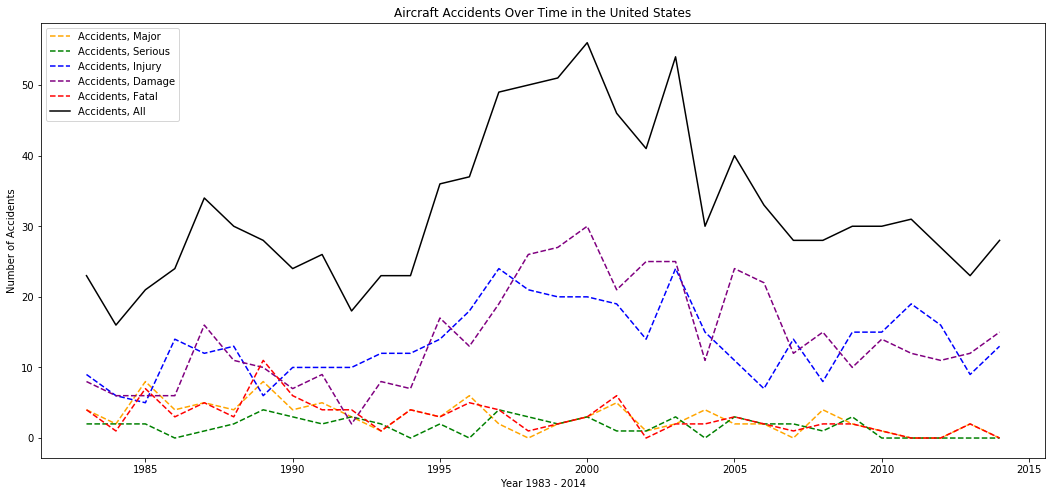

In [33]:
# Plot accident data as a line plot

fig = plt.figure(1, figsize=(18, 8))
ax = fig.add_subplot(1, 1, 1)
plt.title('Aircraft Accidents Over Time in the United States')

plt.plot(accidents_all_clean['Accidents, Major'], "--", color = 'orange', label = 'Accidents, Major')
plt.plot(accidents_all_clean['Accidents, Serious'], "--", color = 'green', label = 'Accidents, Serious')
plt.plot(accidents_all_clean['Accidents, Injury'], "--", color = 'blue', label = 'Accidents, Injury')
plt.plot(accidents_all_clean['Accidents, Damage'], "--", color = 'purple', label = 'Accidents, Damage')
plt.plot(accidents_all_clean['Accidents, Fatal'], "--", color = 'red', label = 'Accidents, Fatal')
plt.plot(accidents_all_clean['Accidents, All'], "-", color = 'black', label = 'Accidents, All')


ax.set_xlabel('Year 1983 - 2014')
ax.set_ylabel('Number of Accidents')
plt.legend(loc='upper left')
plt.show()

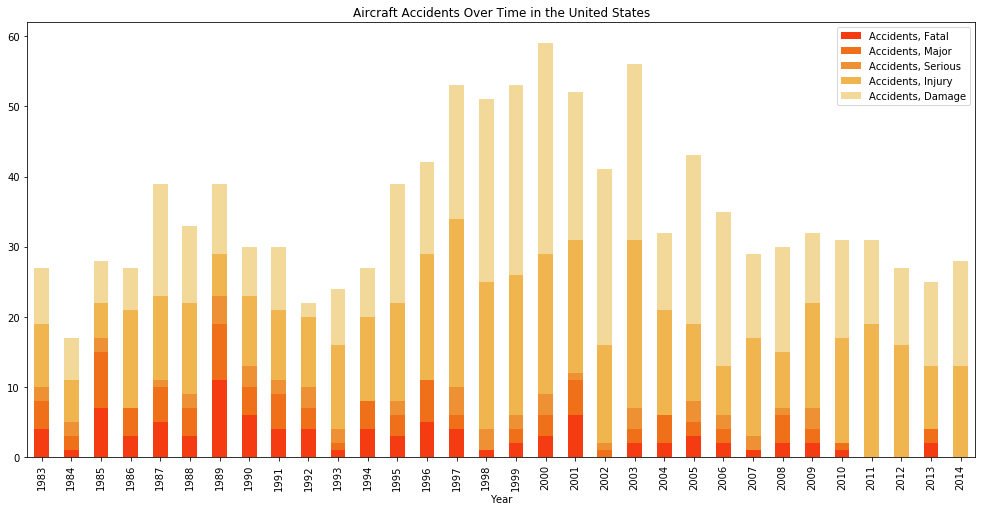

In [34]:
# Plot same accident data but as a stacked bar chart

colors = ['#f53b11', '#f0701a', '#ed9134', '#f0b54f', '#f2d999']

accidents_all_clean.loc[:,['Accidents, Fatal', 'Accidents, Major','Accidents, Serious', 'Accidents, Injury',
                           'Accidents, Damage']].plot.bar(stacked=True, color=colors, figsize=(17,8))
plt.title('Aircraft Accidents Over Time in the United States')
ax.set_xlabel('Year 1983 - 2014')
ax.set_ylabel('Number of Accidents')
plt.show()

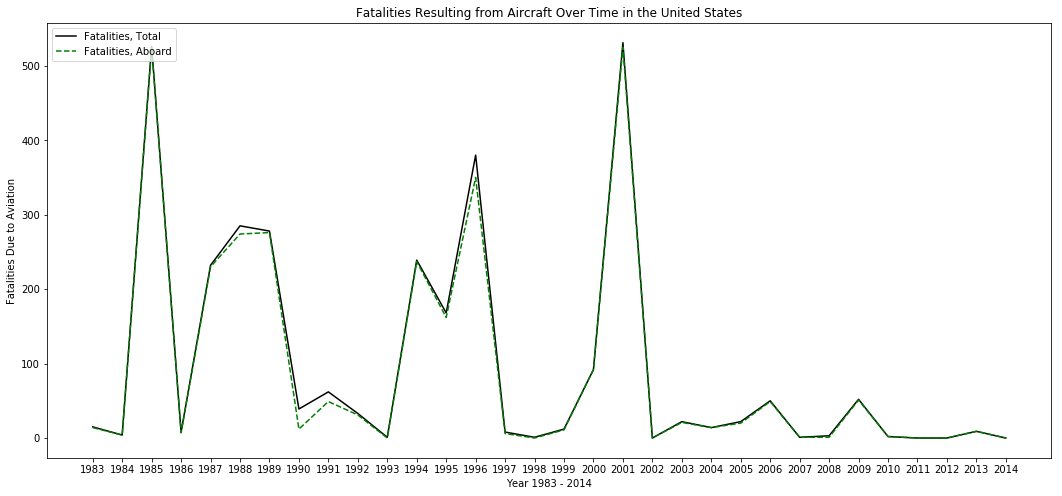

In [35]:
fig = plt.figure(1, figsize=(18, 8))
ax = fig.add_subplot(1, 1, 1)
plt.title('Fatalities Resulting from Aircraft Over Time in the United States')

plt.plot(accidents_all_clean['Fatalities, Total'], "-", color = 'black', label = 'Fatalities, Total')
plt.plot(accidents_all_clean['Fatalities, Aboard'], "--", color = 'green', label = 'Fatalities, Aboard')
plt.xticks(accidents_all_clean['Year'])

ax.set_xlabel('Year 1983 - 2014')
ax.set_ylabel('Fatalities Due to Aviation')
plt.legend(loc='upper left')
plt.show()

* 1 b. How has the ratio of accidents/fatalies per annual miles flown in the United States changed over the past ~30 years? 

> For these, I will again use tables 2 and 3 for accidents and fatalities respectively. Both of these tables contain rate information. I may address this question in several plots. First, plotting with a line or bar the gross miles flown per year. This will bring light to the huge spike in air travel in the past 30 years. After this, I will plot accidents and fatalities as a rate of miles flown per year. This will show that proportional to the increase in air travel over the years, the likelihood of being in a plane that gets in an accidents has gone down dramatically.



Before we dive right in to analyzing rates, its important to understand the other half of the numbers first. Before looking at how the rates of accidents have changed over time, first let's look at how the quantity of air travel has changed over time. 

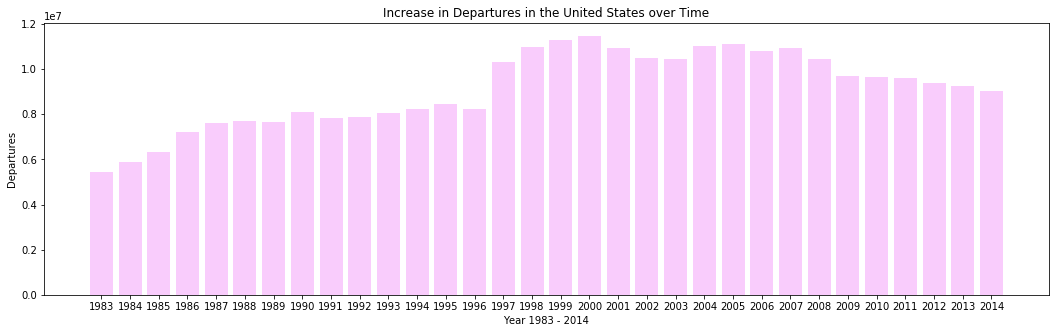

In [36]:
fig = plt.figure(1, figsize=(18, 5))
ax = fig.add_subplot(1, 1, 1)
plt.bar(accidents_all_clean['Year'], accidents_all_clean['Departures'], align='center', alpha=0.5, color='#f59bfa')
plt.xticks(accidents_all_clean['Year'])
plt.ylabel('Departures')
plt.title('Increase in Departures in the United States over Time')
ax.set_xlabel('Year 1983 - 2014')

plt.show()

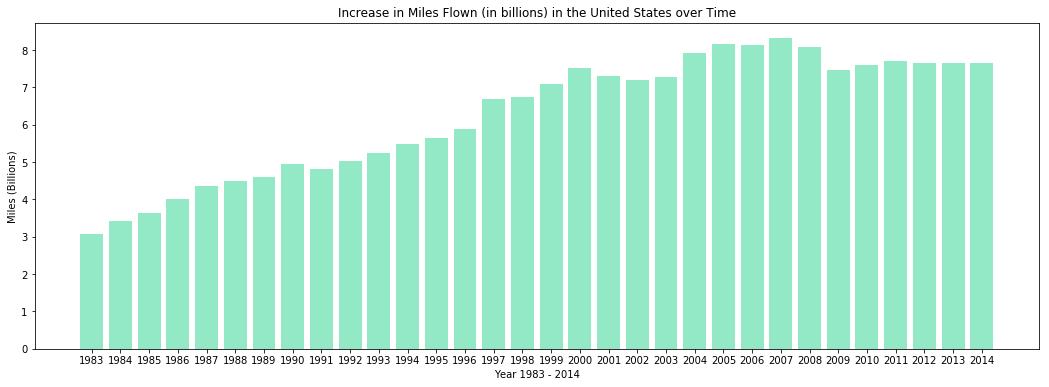

In [41]:
fig = plt.figure(1, figsize=(18, 6))
ax = fig.add_subplot(1, 1, 1)
plt.bar(accidents_all_clean['Year'], accidents_all_clean['Miles Flown']/1000000000, align='center', alpha=0.5, color='#28d48c')
plt.xticks(accidents_all_clean['Year'])
plt.ylabel('Miles (Billions)')
plt.title('Increase in Miles Flown (in billions) in the United States over Time')
ax.set_xlabel('Year 1983 - 2014')

plt.show()

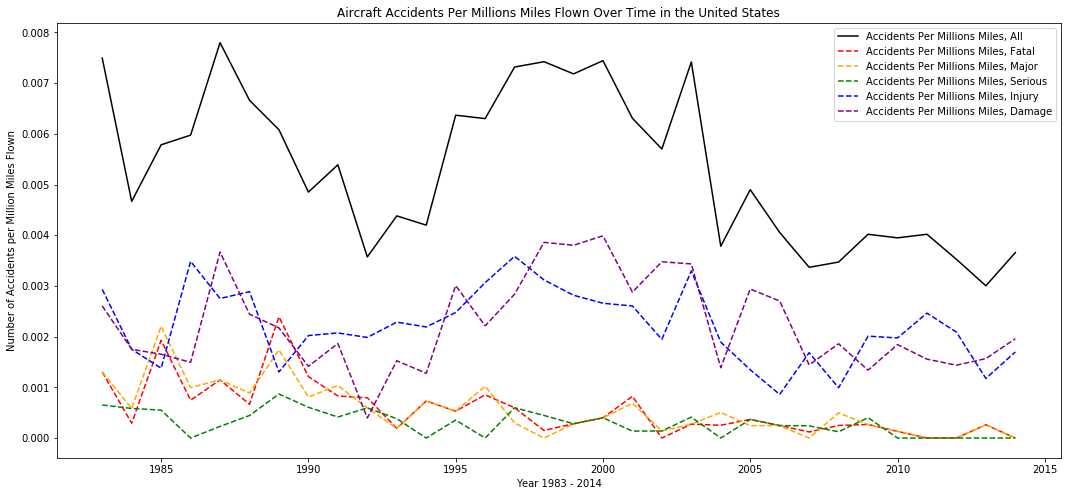

In [275]:
# Plot accident data as a line plot

fig = plt.figure(1, figsize=(18, 8))
ax = fig.add_subplot(1, 1, 1)
plt.title('Aircraft Accidents Per Millions Miles Flown Over Time in the United States')

plt.plot(1000000 * accidents_all_clean['Accidents, All']/accidents_all_clean['Miles Flown'], "-", color = 'black', label = 'Accidents Per Millions Miles, All')
plt.plot(1000000 * accidents_all_clean['Accidents, Fatal']/accidents_all_clean['Miles Flown'], "--", color = 'red', label = 'Accidents Per Millions Miles, Fatal')
plt.plot(1000000 * accidents_all_clean['Accidents, Major']/accidents_all_clean['Miles Flown'], "--", color = 'orange', label = 'Accidents Per Millions Miles, Major')
plt.plot(1000000 * accidents_all_clean['Accidents, Serious']/accidents_all_clean['Miles Flown'], "--", color = 'green', label = 'Accidents Per Millions Miles, Serious')
plt.plot(1000000 * accidents_all_clean['Accidents, Injury']/accidents_all_clean['Miles Flown'], "--", color = 'blue', label = 'Accidents Per Millions Miles, Injury')
plt.plot(1000000 * accidents_all_clean['Accidents, Damage']/accidents_all_clean['Miles Flown'], "--", color = 'purple', label = 'Accidents Per Millions Miles, Damage')


ax.set_xlabel('Year 1983 - 2014')
ax.set_ylabel('Number of Accidents per Million Miles Flown')
plt.legend(loc='upper right')
plt.show()

In [280]:
fatal_rate_df = 1000000 * accidents_all_clean['Accidents, Fatal']/accidents_all_clean['Miles Flown']
fatal_rate_df

Year
1983    0.001303
1984    0.000292
1985    0.001928
1986    0.000747
1987    0.001147
1988    0.000666
1989    0.002389
1990    0.001213
1991    0.000829
1992    0.000794
1993    0.000190
1994    0.000730
1995    0.000531
1996    0.000851
1997    0.000597
1998    0.000148
1999    0.000282
2000    0.000399
2001    0.000823
2002    0.000000
2003    0.000275
2004    0.000252
2005    0.000367
2006    0.000246
2007    0.000120
2008    0.000248
2009    0.000268
2010    0.000132
2011    0.000000
2012    0.000000
2013    0.000261
2014    0.000000
dtype: float64

Hold on, lets review the numbers quickly. Big numbers are hard to grasp.

The last non-zero fatal accident rate was 0.000261 accidents per million miles. 
In other words 0.261 per billion miles. 
Since 0.261 * 4 ~ 1, let's estimate that this is 1 accident per 4 billion miles.

Seattle to New York is 2422 miles. Let's say you flew this route every single day.

You would need to fly from Seattle to New York every day for 1,651,527 days before you would be in a fatal accident based on recent statistics. 

This is the equivalent of flying this route every day for 4,524 years.

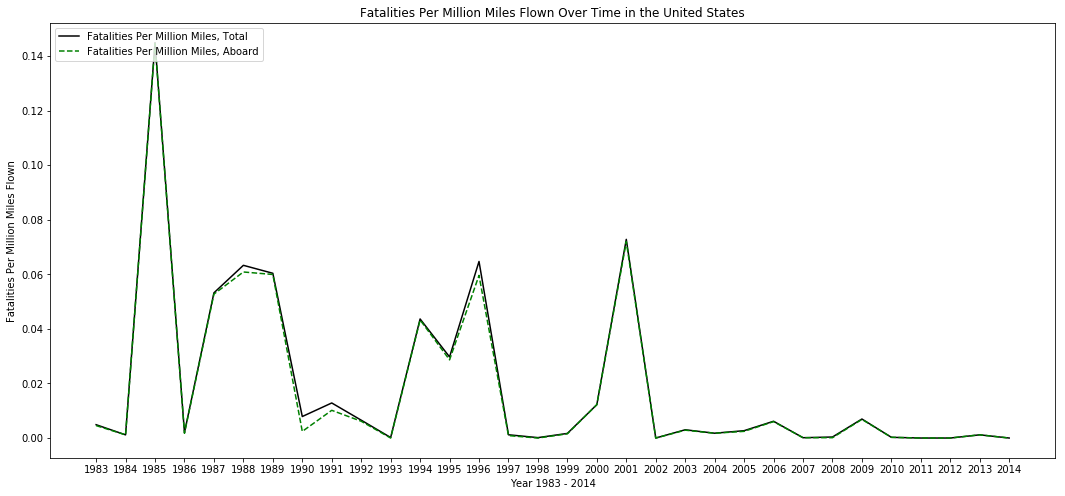

In [271]:
fig = plt.figure(1, figsize=(18, 8))
ax = fig.add_subplot(1, 1, 1)
plt.title('Fatalities Per Million Miles Flown Over Time in the United States')

plt.plot(1000000 * accidents_all_clean['Fatalities, Total']/accidents_all_clean['Miles Flown'], "-", color = 'black', label = 'Fatalities Per Million Miles, Total')
plt.plot(1000000 * accidents_all_clean['Fatalities, Aboard']/accidents_all_clean['Miles Flown'], "--", color = 'green', label = 'Fatalities Per Million Miles, Aboard')
plt.xticks(accidents_all_clean['Year'])

ax.set_xlabel('Year 1983 - 2014')
ax.set_ylabel('Fatalities Per Million Miles Flown')
plt.legend(loc='upper left')
plt.show()

* 1 c. How has the ratio of accidents/fatalies per annual flights hours  in the United States changed over the past ~30 years? 

> For these, I will again use tables 2 and 3 for accidents and fatalities respectively. Both of these tables contain rate information. I may address this question in several plots. First, plotting with a line or bar the gross annual flight hours. This will bring light to the huge spike in air travel in the past 30 years. After this, I will plot accidents and fatalities as a rate of annual flight hours. This will show that proportional to the increase in air travel over the years, the likelihood of being in a plane that gets in an accidents has gone down dramatically.



Before we dive right in to analyzing rates, its important to understand the other half of the numbers first. Before looking at how the rates of accidents have changed over time, first let's look at how the quantity of air travel has changed over time. 

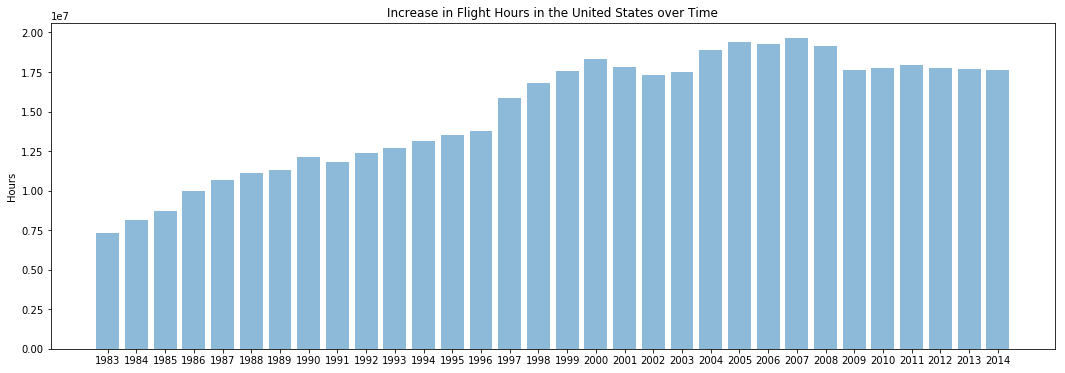

In [241]:
fig = plt.figure(1, figsize=(18, 6))
ax = fig.add_subplot(1, 1, 1)
plt.bar(accidents_all_clean['Year'], accidents_all_clean['Flight Hours'], align='center', alpha=0.5)
plt.xticks(accidents_all_clean['Year'])
plt.ylabel('Hours')
plt.title('Increase in Flight Hours in the United States over Time')
ax.set_xlabel('Year 1983 - 2014')

plt.show()

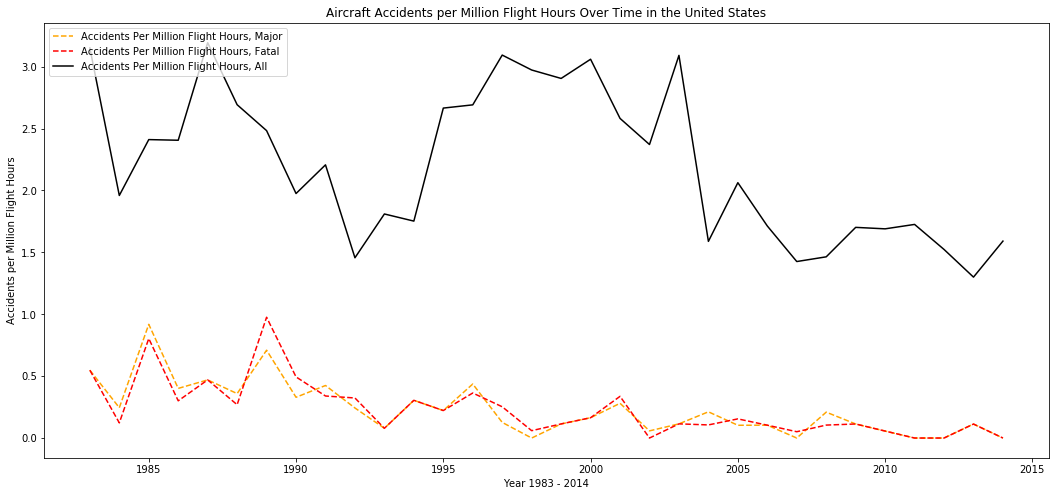

In [281]:
# Plot accident data per flight hours as a line plot

fig = plt.figure(1, figsize=(18, 8))
ax = fig.add_subplot(1, 1, 1)
plt.title('Aircraft Accidents per Million Flight Hours Over Time in the United States')

plt.plot(1000000*accidents_all_clean['Accidents, Major']/accidents_all_clean['Flight Hours'], "--", color = 'orange', label = 'Accidents Per Million Flight Hours, Major')
plt.plot(1000000*accidents_all_clean['Accidents, Fatal']/accidents_all_clean['Flight Hours'], "--", color = 'red', label = 'Accidents Per Million Flight Hours, Fatal')
plt.plot(1000000*accidents_all_clean['Accidents, All']/accidents_all_clean['Flight Hours'], "-", color = 'black', label = 'Accidents Per Million Flight Hours, All')


ax.set_xlabel('Year 1983 - 2014')
ax.set_ylabel('Accidents per Million Flight Hours')
plt.legend(loc='upper left')
plt.show()

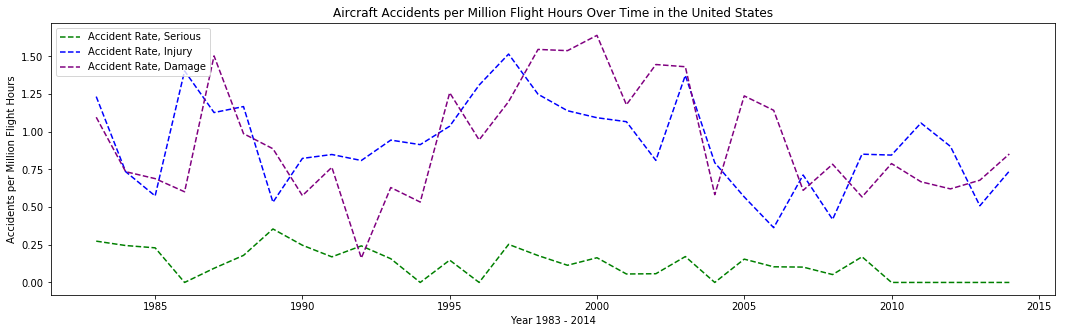

In [282]:
# Plot accident data per flight hours as a line plot

fig = plt.figure(1, figsize=(18, 5))
ax = fig.add_subplot(1, 1, 1)
plt.title('Aircraft Accidents per Million Flight Hours Over Time in the United States')

plt.plot(1000000*accidents_all_clean['Accidents, Serious']/accidents_all_clean['Flight Hours'], "--", color = 'green', label = 'Accident Rate, Serious')
plt.plot(1000000*accidents_all_clean['Accidents, Injury']/accidents_all_clean['Flight Hours'], "--", color = 'blue', label = 'Accident Rate, Injury')
plt.plot(1000000*accidents_all_clean['Accidents, Damage']/accidents_all_clean['Flight Hours'], "--", color = 'purple', label = 'Accident Rate, Damage')


ax.set_xlabel('Year 1983 - 2014')
ax.set_ylabel('Accidents per Million Flight Hours')
plt.legend(loc='upper left')
plt.show()


Here, I separated out the accidents in to two different charts. There is an interesting trend with all accidents, fatal accidents, and major accidents which trends down. However, for 'Serious', 'Injury', and 'Damage' accidents, the numbers are a little bit more volatile over, not showing as distinguished of a decline from the 1980's to the present. As a reminder, these accidents are defined below:


#### Major 
An accident in which any of three conditions is met: 1) a Part 121 aircraft was destroyed, or 2) there were multiple fatalities, or 3) there was one fatality and a Part 121 aircraft was substantially damaged.
#### Serious
An accident in which any of three conditions is met: 1) a Part 121 aircraft was destroyed, or 2) there were multiple fatalities, or 3) there was one fatality and a Part 121 aircraft was substantially damaged.
#### Injury
A nonfatal accident with at least one serious injury and without substantial damage to a Part 121 aircraft. 
#### Damage 
An accident in which no person was killed or seriously injured, but in which any aircraft was substantially damaged.

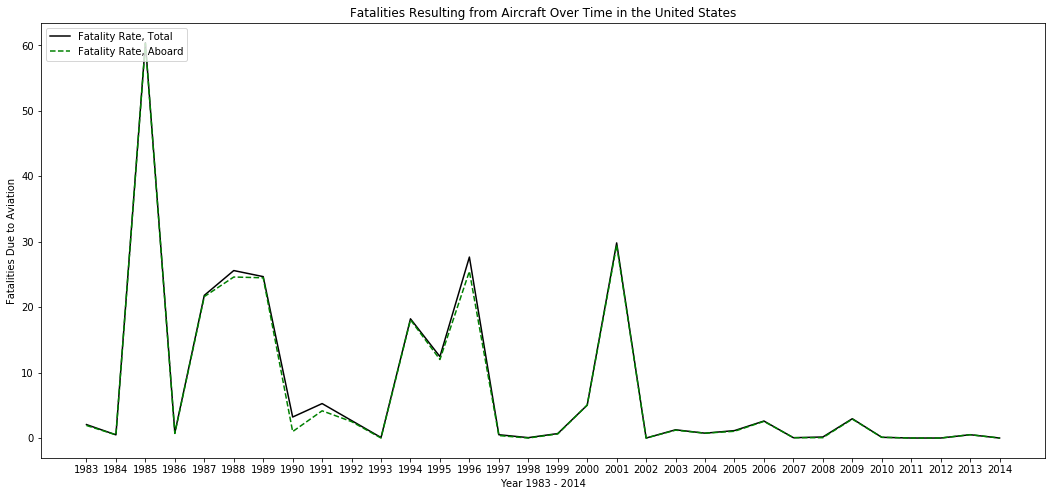

In [261]:
fig = plt.figure(1, figsize=(18, 8))
ax = fig.add_subplot(1, 1, 1)
plt.title('Fatalities Per Million Flight Hours Over Time in the United States')

plt.plot(1000000*accidents_all_clean['Fatalities, Total']/accidents_all_clean['Flight Hours'], "-", color = 'black', label = 'Fatality Rate, Total')
plt.plot(1000000*accidents_all_clean['Fatalities, Aboard']/accidents_all_clean['Flight Hours'], "--", color = 'green', label = 'Fatality Rate, Aboard')
plt.xticks(accidents_all_clean['Year'])

ax.set_xlabel('Year 1983 - 2014')
ax.set_ylabel('Fatalities Per Million Flight Hours')
plt.legend(loc='upper left')
plt.show()

* 1 d. How do the rates of accidents/fatalities vary between commercial* and all public and private flights?

> After addressing parts 1a-1c for just commercial* flights, I have data in table 4 contains the same accident, fatality, and rate data but instead for general aviation in the United States. I will use this to compare the relative safety of commercial flight vs general flight (include private and personal flights). I will choose just one metric - accidents per flight hour, and plot both the commercial and general aviation lines on the same plot in different colors.

In [328]:
genav_clean.head(5)

,Year,"Accidents, All","Accidents, Fatal","Fatalities, Total","Fatalities, Aboard",Flight Hours,"Accidents per 100,000 Flight Hour, All","Accidents per 100,000 Flight Hour, Fatal"
0,1975,3995,633,1252,1231,28799000,13.87,2.19
1,1976,4018,658,1216,1203,30476000,13.17,2.16
2,1977,4079,661,1276,1265,31578000,12.91,2.09
3,1978,4216,719,1556,1398,34887000,12.08,2.06
4,1979,3818,631,1221,1203,38641000,9.88,1.63


Based on the data that I have for general aviation, there are 3 things I will compare:

* Quantity of Accidents
* Quantity of Fatalities
* Rate of Accidents per Million Flight Hours
* Rate of Fatalities per Million Flight Hours

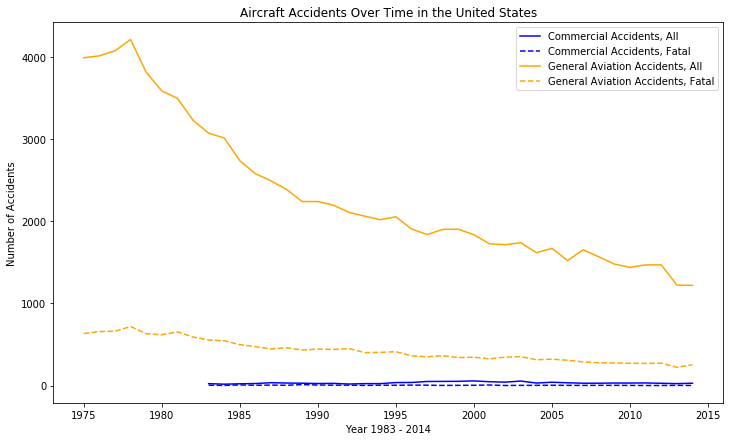

In [61]:
# Plot accident data as a line plot

fig = plt.figure(1, figsize=(12, 7))
ax = fig.add_subplot(1, 1, 1)
plt.title('Aircraft Accidents Over Time in the United States')

plt.plot(accidents_all_clean['Accidents, All'], "-", color = 'blue', label = 'Commercial Accidents, All')
plt.plot(accidents_all_clean['Accidents, Fatal'], "--", color = 'blue', label = 'Commercial Accidents, Fatal')
plt.plot(genav_clean['Accidents, All'], "-", color = 'orange', label = 'General Aviation Accidents, All')
plt.plot(genav_clean['Accidents, Fatal'], "--", color = 'orange', label = 'General Aviation Accidents, Fatal')


ax.set_xlabel('Year 1983 - 2014')
ax.set_ylabel('Number of Accidents')
plt.legend(loc='upper right')
plt.show()


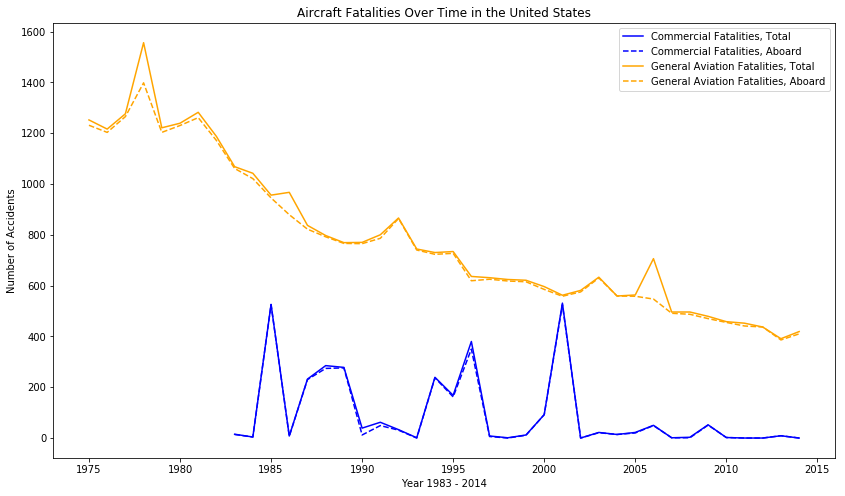

In [66]:
# Plot fatalities data as a line plot

fig = plt.figure(1, figsize=(14, 8))
ax = fig.add_subplot(1, 1, 1)
plt.title('Aircraft Fatalities Over Time in the United States')

plt.plot(accidents_all_clean['Fatalities, Total'], "-", color = 'blue', label = 'Commercial Fatalities, Total')
plt.plot(accidents_all_clean['Fatalities, Aboard'], "--", color = 'blue', label = 'Commercial Fatalities, Aboard')
plt.plot(genav_clean['Fatalities, Total'], "-", color = 'orange', label = 'General Aviation Fatalities, Total')
plt.plot(genav_clean['Fatalities, Aboard'], "--", color = 'orange', label = 'General Aviation Fatalities, Aboard')


ax.set_xlabel('Year 1983 - 2014')
ax.set_ylabel('Number of Accidents')
plt.legend(loc='upper right')
plt.show()

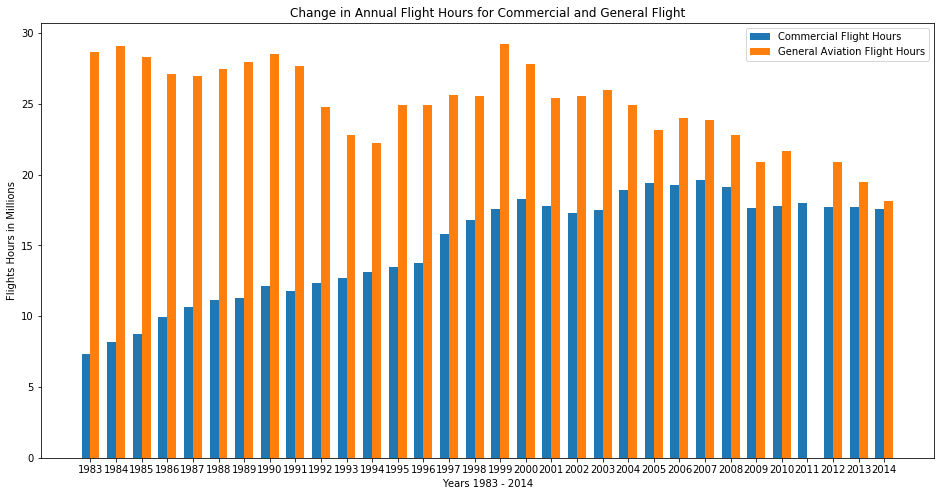

In [65]:
# Set years to be labels
labels = accidents_all_clean['Year'].values

# Make years to be the x axis
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Create bar plot
fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width/2, accidents_all_clean['Flight Hours']/1000000, width, label='Commercial Flight Hours')
rects2 = ax.bar(x + width/2, genav_clean['Flight Hours'].loc[1983:2015]/1000000, width, label='General Aviation Flight Hours')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Flights Hours in Millions')
ax.set_xlabel('Years 1983 - 2014')
ax.set_title('Change in Annual Flight Hours for Commercial and General Flight')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

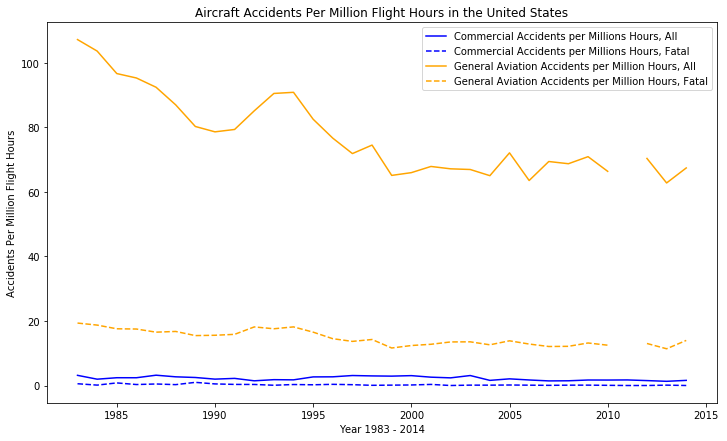

In [59]:
# Plot accident data as a line plot

fig = plt.figure(1, figsize=(12, 7))
ax = fig.add_subplot(1, 1, 1)
plt.title('Aircraft Accidents Per Million Flight Hours in the United States')

plt.plot(accidents_all_clean['Accidents, All']/(accidents_all_clean['Flight Hours']/1000000), 
         "-", color = 'blue', label = 'Commercial Accidents per Millions Hours, All')
plt.plot(accidents_all_clean['Accidents, Fatal']/(accidents_all_clean['Flight Hours']/1000000),
         "--", color = 'blue', label = 'Commercial Accidents per Millions Hours, Fatal')
plt.plot(genav_clean['Accidents, All']/(genav_clean['Flight Hours'].loc[1983:2015]/1000000), 
         "-", color = 'orange', label = 'General Aviation Accidents per Million Hours, All')
plt.plot(genav_clean['Accidents, Fatal']/(genav_clean['Flight Hours'].loc[1983:2015]/1000000), 
         "--", color = 'orange', label = 'General Aviation Accidents per Million Hours, Fatal')


ax.set_xlabel('Year 1983 - 2014')
ax.set_ylabel('Accidents Per Million Flight Hours')
plt.legend(loc='upper right')
plt.show()

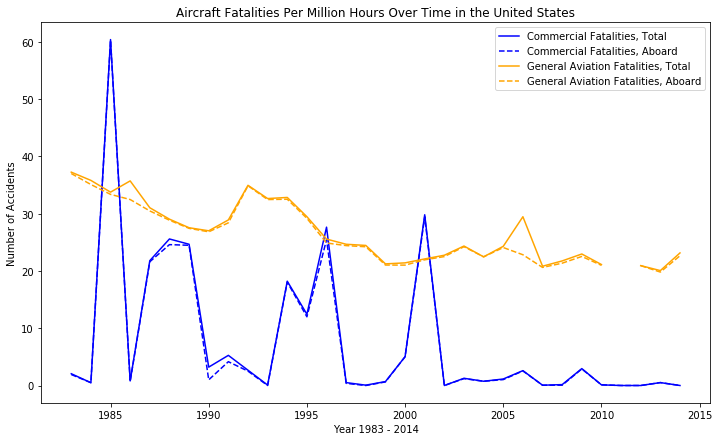

In [60]:
# Plot fatality rates data as a line plot

fig = plt.figure(1, figsize=(12, 7))
ax = fig.add_subplot(1, 1, 1)
plt.title('Aircraft Fatalities Per Million Hours Over Time in the United States')

plt.plot(accidents_all_clean['Fatalities, Total']/(accidents_all_clean['Flight Hours']/1000000),
         "-", color = 'blue', label = 'Commercial Fatalities, Total')
plt.plot(accidents_all_clean['Fatalities, Aboard']/(accidents_all_clean['Flight Hours']/1000000),
         "--", color = 'blue', label = 'Commercial Fatalities, Aboard')
plt.plot(genav_clean['Fatalities, Total']/(genav_clean['Flight Hours'].loc[1983:2015]/1000000),
         "-", color = 'orange', label = 'General Aviation Fatalities, Total')
plt.plot(genav_clean['Fatalities, Aboard']/(genav_clean['Flight Hours'].loc[1983:2015]/1000000),
         "--", color = 'orange', label = 'General Aviation Fatalities, Aboard')


ax.set_xlabel('Year 1983 - 2014')
ax.set_ylabel('Number of Accidents')
plt.legend(loc='upper right')
plt.show()

2. What kinds of planes are responsible for the most accidents? 

> Finally, in looking at source 1, my most detailed data source, I can see more granular information for each accident. This contains the type of airplane for every data entry. To present to the reader what planes are responsible for the most crashes, I will create a pivot table that sums the number of accidents for each plane. Then, I will create a table for the reader that displays just the top 5 planes. Since I do not expect the reader to have a knowledge of all types of planes, I will either include an image or brief description of the plane.

> This methodology was further refined in to two sub questions. One looked at the most common plane amongst all incidents, the second method looked at the most common plane in fatal accidents.

In [415]:
faa_aids.columns

Index(['AIDS Report Number', 'Local Event Date', 'Event City', 'Event State',
       'Event Airport', 'Event Type', 'Aircraft Damage', 'Flight Phase',
       'Aircraft Make', 'Aircraft Model', 'Aircraft Series', 'Operator',
       'Primary Flight Type', 'Flight Conduct Code', 'Flight Plan Filed Code',
       'Aircraft Registration Nbr', 'Total Fatalities', 'Total Injuries',
       'Aircraft Engine Make', 'Aircraft Engine Model', 'Engine Group Code',
       'Nbr of Engines', 'PIC Certificate Type', 'PIC Flight Time Total Hrs',
       'PIC Flight Time Total Make-Model'],
      dtype='object')

For the first analysis we look at all incidents. Not all of these are fatal, in fact most of them are not, it just means there is an incident of some sort recorded in the database for these planes.

In [443]:
# Next, we essentially create a pivot table of the make/model of the airplanes
plane_type_subset = faa_aids[['AIDS Report Number', 'Aircraft Make','Aircraft Model']].copy()
plane_type_subset['Aircraft Make Model'] = plane_type_subset['Aircraft Make'] + ' ' + plane_type_subset['Aircraft Model']

# Drop rows with no make/model data
plane_type_subset = plane_type_subset.replace('nan', np.nan)
plane_type_subset_clean  = plane_type_subset.dropna()

# Sort by largest count
type_count = plane_type_subset_clean.groupby(['Aircraft Make Model']).count()
type_count.sort_values(by =['AIDS Report Number'], ascending = False).head(5)


,AIDS Report Number,Aircraft Make,Aircraft Model
Aircraft Make Model,,,
CESSNA CE-172,5382,5382,5382
PIPER PA-28,4282,4282,4282
BOEING 727,3442,3442,3442
CESSNA CE-210,3308,3308,3308
MOONEY M-20,3142,3142,3142


For the next analysis we will look at the aircraft with the most fatal accidents.

In [44]:
# Next, we essentially create a pivot table of the make/model of the airplanes
fatal_plane_type_subset = faa_aids[['AIDS Report Number', 'Aircraft Make','Aircraft Model', 
                                    'Total Fatalities']].copy()
fatal_plane_type_subset['Aircraft Make Model'] = fatal_plane_type_subset['Aircraft Make'] + ' ' + fatal_plane_type_subset['Aircraft Model']

# Drop rows with no make/model data
fatal_plane_type_subset = fatal_plane_type_subset.replace('nan', np.nan)
fatal_plane_type_subset_clean  = fatal_plane_type_subset.dropna()

# Drop items with zero fatalities
fatal_plane_type_subset_clean = fatal_plane_type_subset_clean[fatal_plane_type_subset_clean['Total Fatalities'] > 0]

# Group by make/model, Sort by largest count
fatal_type_count = fatal_plane_type_subset_clean.groupby(['Aircraft Make Model']).count()
fatal_type_count.sort_values(by =['AIDS Report Number'], ascending = False).head(5)

,AIDS Report Number,Aircraft Make,Aircraft Model,Total Fatalities
Aircraft Make Model,,,,
CESSNA CE-182,216,216,216,216
DE HAVILLAND-BOMBARDIER DHC-6 TWIN OTTER,55,55,55,55
CESSNA CE-180,40,40,40,40
CESSNA CE-206,39,39,39,39
DOUG DC-3,38,38,38,38


3. How does the experience level of the pilots impact airplane crashes?

> A question a reader may ask if they are boarding a plane is - how experienced is my pilot? Data source 1, the detailed table, also contains a column with number of hours of experience of the Pilot In Control for most accidents. I will extract this column and create a histogram so that the reader can see the distribution of number of experience hours of pilots who have been in crashes, and observe for themselves if they think that number of hours could be a factor in safety.

In [45]:
# Next, we subset the data to just the columns of interest
PIC_subset = faa_aids[['AIDS Report Number', 'Aircraft Damage', 'Total Fatalities', 'PIC Certificate Type', 
                       'PIC Flight Time Total Hrs', 'PIC Flight Time Total Make-Model', 
                      'Aircraft Make', 'Aircraft Model']].copy()
PIC_subset['Aircraft Make Model'] = PIC_subset['Aircraft Make'] + ' ' + fatal_plane_type_subset['Aircraft Model']

# Drop rows which have NA for any of the 3 PIC columns of interest
PIC_subset = PIC_subset.dropna(subset=['PIC Certificate Type', 'PIC Flight Time Total Hrs', 'PIC Flight Time Total Make-Model'])

# Group by PIC certificate type, Sort by largest count
PIC_cert_count = PIC_subset.groupby(['PIC Certificate Type']).count()
PIC_cert_count.sort_values(by =['AIDS Report Number'], ascending = False).head(10)


,AIDS Report Number,Aircraft Damage,Total Fatalities,PIC Flight Time Total Hrs,PIC Flight Time Total Make-Model,Aircraft Make,Aircraft Model,Aircraft Make Model
PIC Certificate Type,,,,,,,,
PRIVATE PILOT,27551,23386,27551,27551,27551,27551,27551,26966
COMMERCIAL PILOT,17037,13537,17037,17037,17037,17037,17037,16781
AIRLINE TRANSPORT,14974,9017,14974,14974,14974,14974,14974,14798
COMMERCIAL PILOT FLIGHT INSTRUCTOR,6974,5760,6974,6974,6974,6974,6974,6876
STUDENT,5426,4647,5426,5426,5426,5426,5426,5391
AIRLINE TRANSPORT PILOT FLIGHT INSTRUCTOR,3768,2823,3768,3768,3768,3768,3768,3699
UNKNOWN/FOREIGN,687,516,687,687,687,687,687,674
PRIVATE PILOT FLIGHT INSTRUCTOR,159,148,159,159,159,159,159,149
PILOT NOT CERTIFICATED,102,94,102,102,102,102,102,76


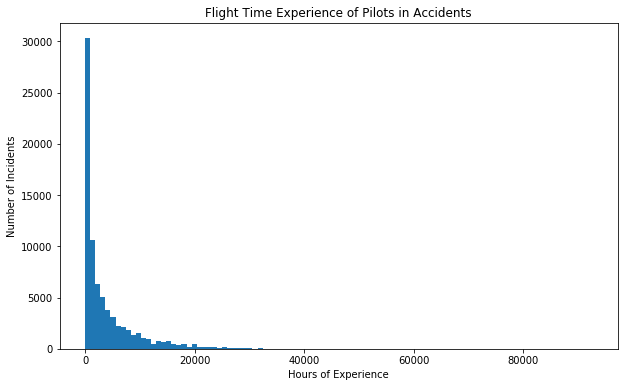

In [71]:
# Look at a histogram of the distributions of pilots experience
# Experience here is measured by total number of flight hours

fig = plt.figure(1, figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
plt.title('Flight Time Experience of Pilots in Accidents')
ax.set_ylabel('Number of Incidents')
ax.set_xlabel('Hours of Experience')

plt.hist(PIC_subset['PIC Flight Time Total Hrs'], 100)


plt.show()

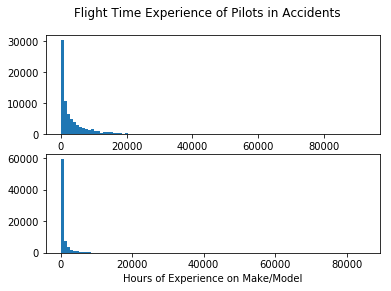

In [76]:
# Look at a histogram of the distributions of pilots experience
# Experience here is measured by total number of flight hours

fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Flight Time Experience of Pilots in Accidents')
ax1.set_xlabel('Hours of Experience')
ax1.hist(PIC_subset['PIC Flight Time Total Hrs'], 100)

ax2.set_xlabel('Hours of Experience on Make/Model')
ax2.hist(PIC_subset['PIC Flight Time Total Make-Model'], 100)



# fig = plt.figure(1, figsize=(10, 6))
# ax = fig.add_subplot(1, 1, 1)
# plt.title('Flight Time Experience of Pilots in Accidents')
# ax.set_ylabel('Number of Incidents')
# ax.set_xlabel('Hours of Experience')

# plt.hist(PIC_subset['PIC Flight Time Total Hrs'], 100)


# ax1 = fig.add_subplot(2, 1, 1)
# plt.title('Flight Time Experience on Make/Mode of Pilots in Accidents')
# ax1.set_ylabel('Number of Incidents')
# ax1.set_xlabel('Hours of Experience on Model')

# plt.hist(PIC_subset['PIC Flight Time Total Make-Model'], 100)


plt.show()

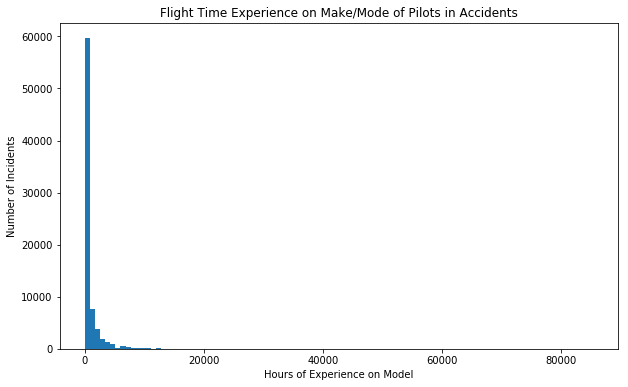

In [52]:
# Look at a histogram of the distributions of pilots experience
# Experience here is measured by total number of flight hours in make/model

fig = plt.figure(1, figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
plt.title('Flight Time Experience on Make/Mode of Pilots in Accidents')
ax.set_ylabel('Number of Incidents')
ax.set_xlabel('Hours of Experience on Model')



plt.hist(PIC_subset['PIC Flight Time Total Make-Model'], 100)
plt.show()

## VIII. Conclusion